# 📘 Notebook 01 — Exploratory Data Analysis (EDA)

This notebook explores the California Housing dataset used in our
`house-price-ml-v2-feature-engineering` project.

It is **not** used for training — training happens in `src/train.py`.

Goals:
- Understand the structure of the dataset
- Explore distributions of features
- Detect skew / outliers
- Explore correlations
- Visualize important relationships
- Document insights for the final report

**NOTE:** Run `python3 -m src.train` before this notebook
if the model has not been trained yet.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [14]:
# Load Raw Data
df = pd.read_csv("../data/raw/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
# Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
# Missing Values Analysis
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
# Basic Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


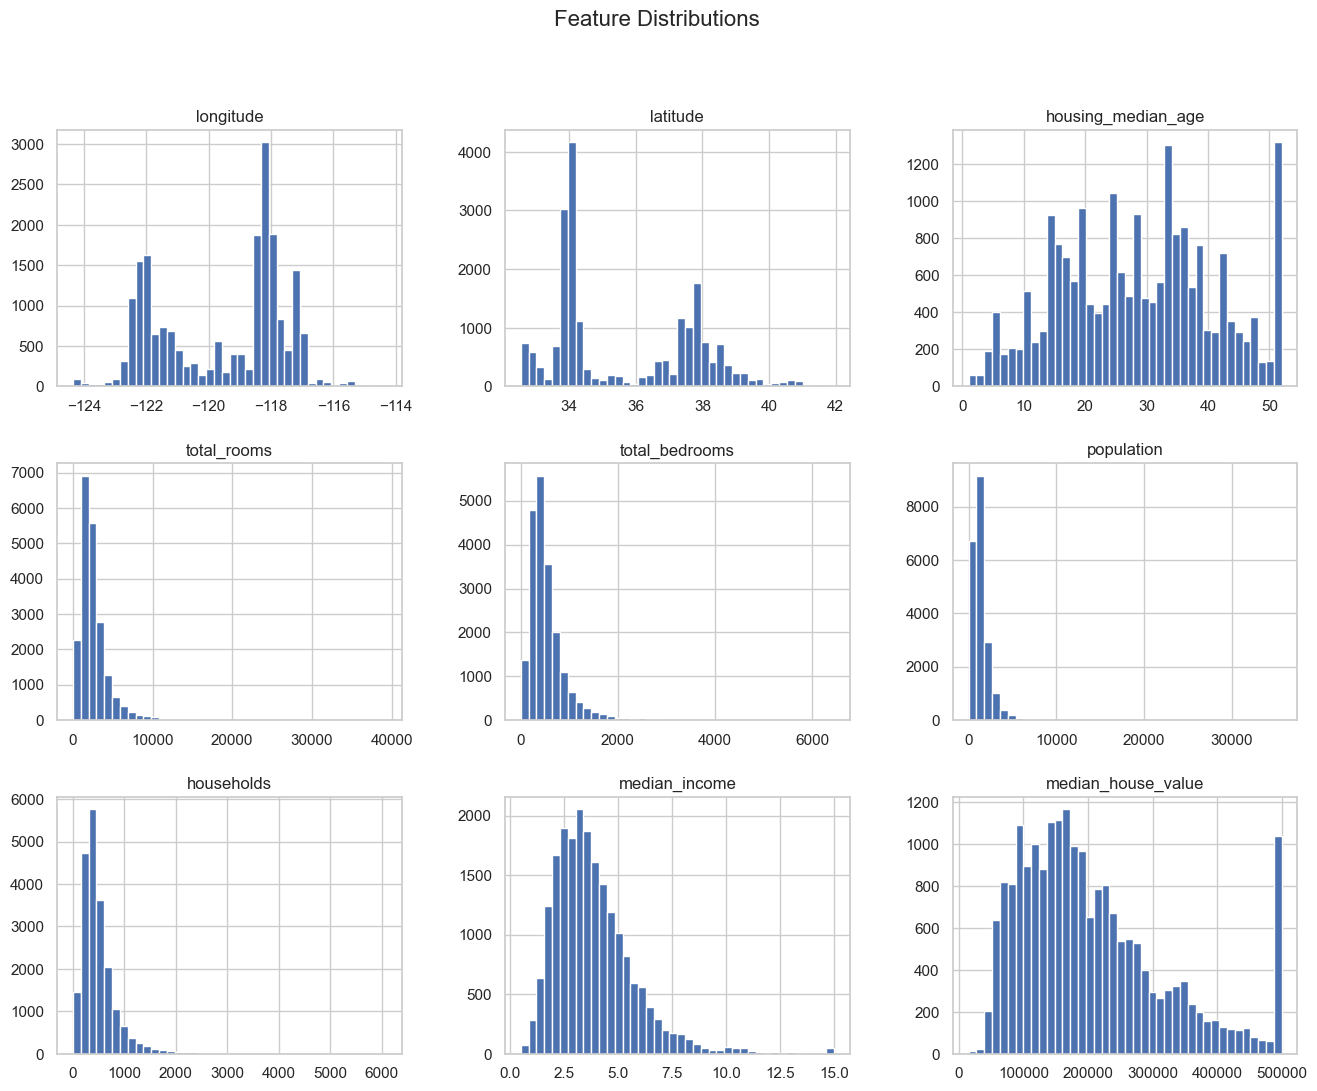

In [18]:
# Histograms for Each Feature
df.hist(figsize=(16, 12), bins=40)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [20]:
# Check Skewness
df.skew(numeric_only=True)

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.459546
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
dtype: float64

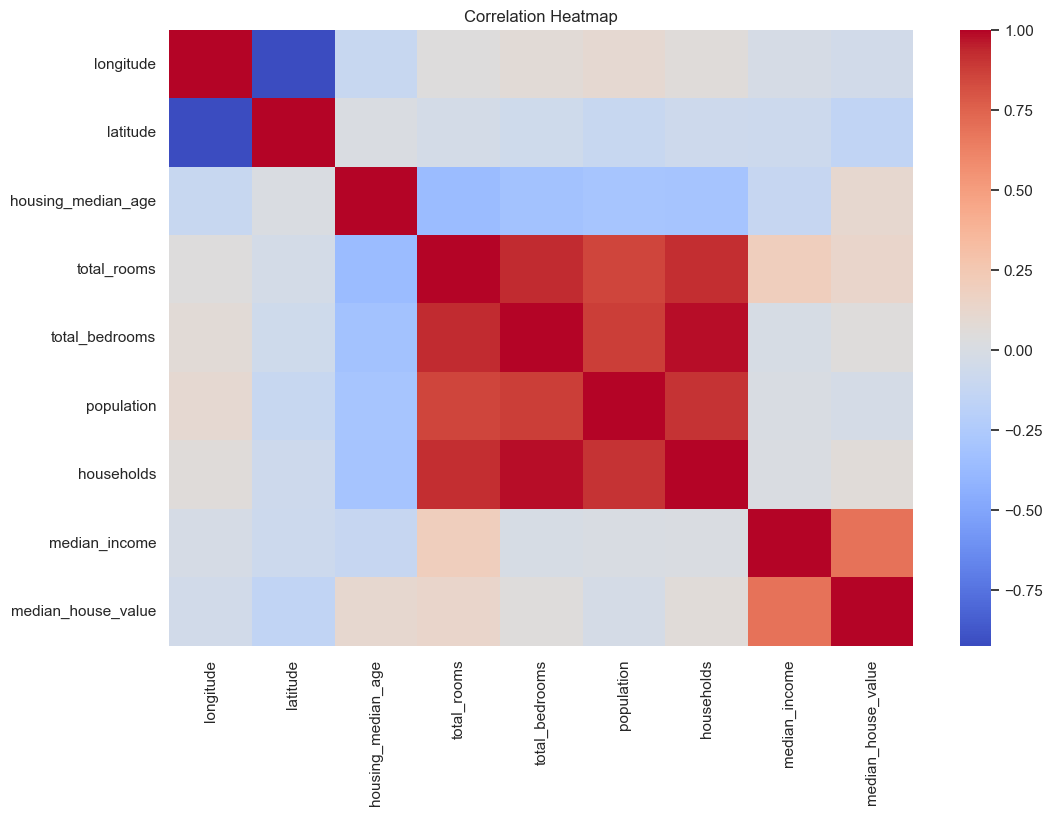

In [21]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

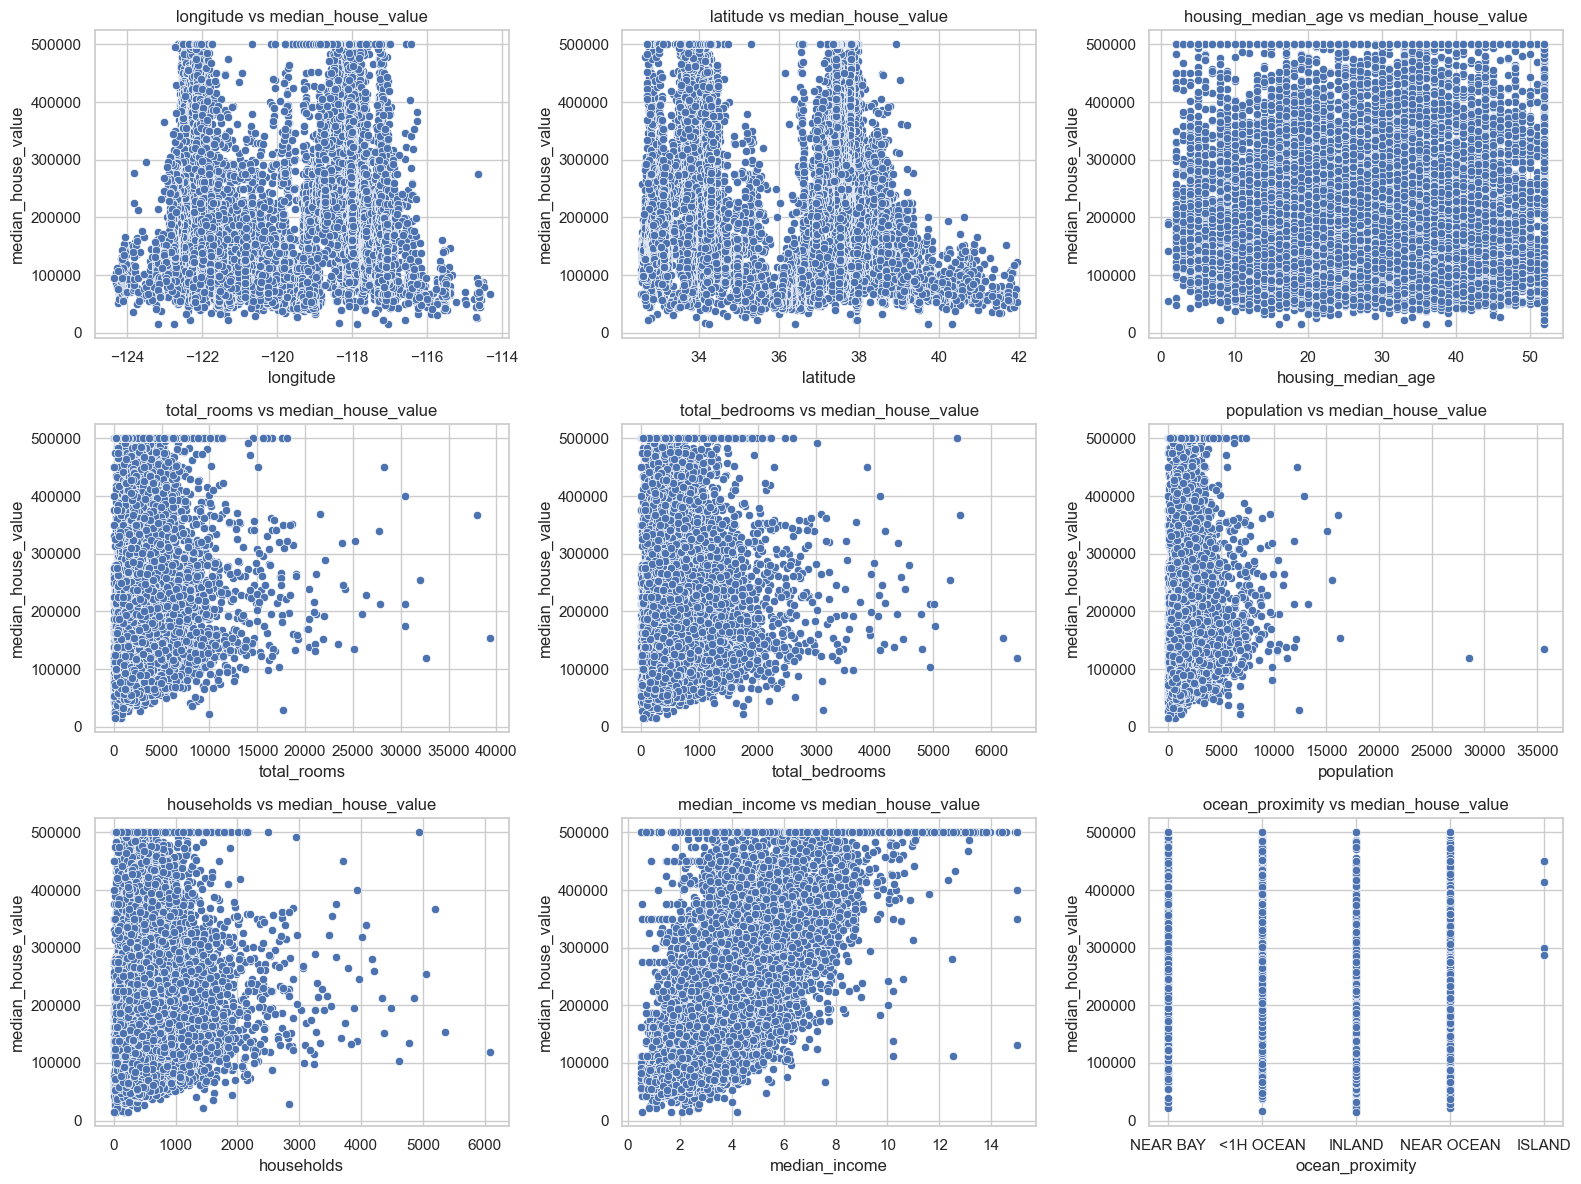

In [22]:
# Scatter Plots vs Target
target = "median_house_value"
features = df.columns.drop(target)

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(features[:9]):
    sns.scatterplot(data=df, x=col, y=target, ax=axes[idx])
    axes[idx].set_title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

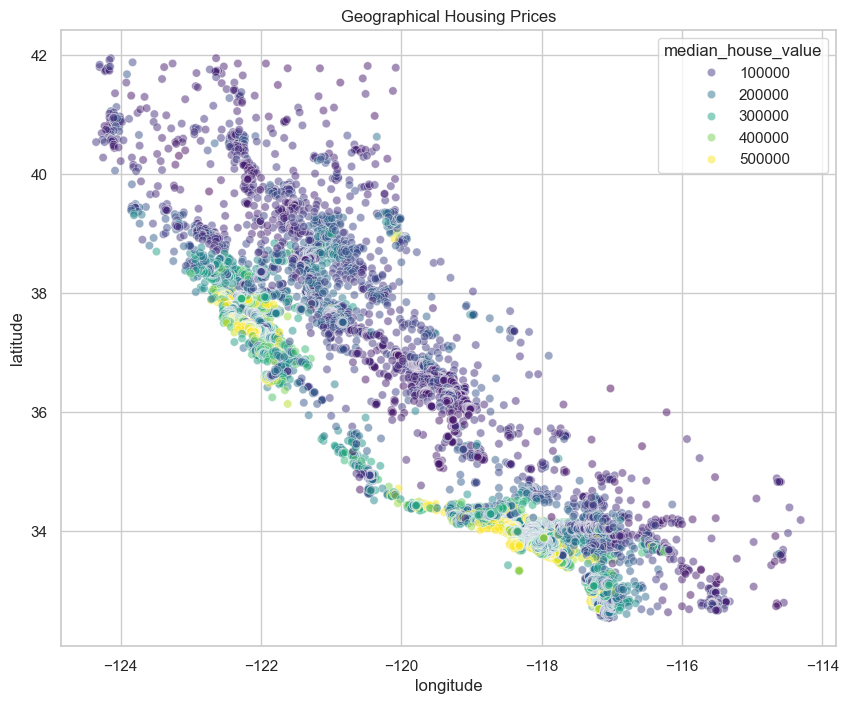

In [23]:
# Longitude/Latitude Map
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    hue="median_house_value",
    palette="viridis",
    alpha=0.5
)
plt.title("Geographical Housing Prices")
plt.show()

# 🔍 Insights Summary

- **Most important correlated features:**  
  - Median income  
  - Rooms per household  
  - Bedrooms per household  
  - Population per household  

- **Skewed features:**  
  - Population  
  - Total rooms  
  - Total bedrooms  

- **Geographical pattern:**  
  - Coastal areas → higher median_house_value  
  - Inland regions → lower prices  

- **Next steps:**  
  - Apply feature engineering (ratios, logs)  
  - Standardize data before training  
  - Train gradient descent model  

---

NOTE
🟩 Version 1 (simple baseline)

In v1, you did:

- manual feature selection
- picked only the “important” features (e.g., median_income, etc.)
- used standard linear regression from sklearn
- kept it very simple and educational

🟦 Version 2 (full ML pipeline)

In Version 2, you are building a professional-grade ML pipeline, so the strategy changes:

⭐ WE USE ALL FEATURES + ALL ENGINEERED FEATURES

(unless a feature is clearly useless or duplicates another — but we haven’t removed any yet)

When you engineer features correctly and standardize them, linear regression benefits from more features, not fewer.

If a feature is useless, L1/L2 regularization will shrink its weight automatically.

So manual feature selection is no longer needed.

🟦 This is why we needed EDA notebook

- to justify logs (because skew)
- to justify ratios (because scale imbalance)
- to justify polynomial features (because nonlinearity)
- to justify categorical encoding